In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
import data_pre_proces
import copy
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [39]:
data_black_fraiday = pd.read_csv("BlackFriday.csv", header=None,sep=',')
data_black_fraiday.columns = [i for i in  data_black_fraiday.loc[[0]].values[0]]
data_black_fraiday = data_black_fraiday.drop([0])
data_black_fraiday.index = range(data_black_fraiday.shape[0])
data_reserv_data_black_fraiday = copy.deepcopy(data_black_fraiday)
# Print the original version of data
print(data_black_fraiday)

C:\Users\Admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,4,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


        User_ID Product_ID Gender    Age Occupation City_Category  \
0       1000001  P00069042      F   0-17         10             A   
1       1000001  P00248942      F   0-17         10             A   
2       1000001  P00087842      F   0-17         10             A   
3       1000001  P00085442      F   0-17         10             A   
4       1000002  P00285442      M    55+         16             C   
5       1000003  P00193542      M  26-35         15             A   
6       1000004  P00184942      M  46-50          7             B   
7       1000004  P00346142      M  46-50          7             B   
8       1000004   P0097242      M  46-50          7             B   
9       1000005  P00274942      M  26-35         20             A   
10      1000005  P00251242      M  26-35         20             A   
11      1000005  P00014542      M  26-35         20             A   
12      1000005  P00031342      M  26-35         20             A   
13      1000005  P00145042      M 

C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


        User_ID  Product_ID  Gender Age  Occupation  City_Category  \
0       1000001       69042       0   0          10              0   
1       1000001      248942       0   0          10              0   
2       1000001       87842       0   0          10              0   
3       1000001       85442       0   0          10              0   
4       1000002      285442       1   6          16              1   
5       1000003      193542       1   2          15              0   
6       1000004      184942       1   4           7              2   
7       1000004      346142       1   4           7              2   
8       1000004       97242       1   4           7              2   
9       1000005      274942       1   2          20              0   
10      1000005      251242       1   2          20              0   
11      1000005       14542       1   2          20              0   
12      1000005       31342       1   2          20              0   
13      1000005     

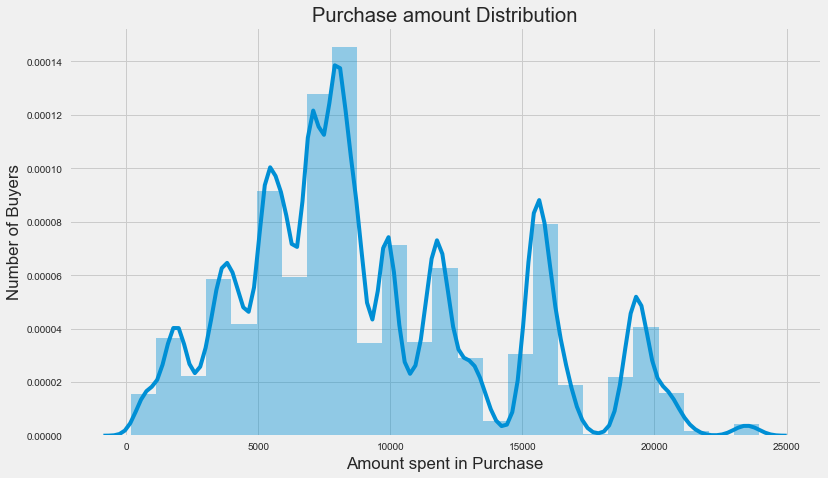

In [40]:
dct_for_age = {'0-17': 0, '18-25': 1 ,'26-35': 2, '36-45' : 3, '46-50' : 4, '51-55' : 5, '55+' : 6}
#Modification of data and numeric imputation
def modification_of_data(data,name_of_col,dct):
    for i in dct.keys():
        data.loc[data[name_of_col] == i, name_of_col] = dct[i]
    return data

data = data_pre_proces.elements_col_to_int(data_black_fraiday,'Gender')
data = modification_of_data(data,'Age',dct_for_age)
data.loc[data['Stay_In_Current_City_Years'] == '4+', 'Stay_In_Current_City_Years'] = '4'
data.Gender = pd.to_numeric(data.Gender)
data.Occupation = pd.to_numeric(data.Occupation)
data = data_pre_proces.elements_col_to_int(data_black_fraiday,'City_Category')
data.Purchase = pd.to_numeric(data.Purchase)
data.Stay_In_Current_City_Years = pd.to_numeric(data.Stay_In_Current_City_Years)
data.Marital_Status = pd.to_numeric(data.Marital_Status)
data.Product_Category_1 = pd.to_numeric(data.Product_Category_1)
data.Product_Category_2 = pd.to_numeric(data.Product_Category_2)
data.Product_Category_3 = pd.to_numeric(data.Product_Category_3)
data['Product_ID'] = data['Product_ID'].str.replace('P00', '')
data.Product_ID = pd.to_numeric(data.Product_ID)
# show the distribution of the price ---> it looks like normal distribution per Number of Buyers 
def plot_show(data,col_name):
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(12,7))
    sns.distplot(data[col_name], bins = 25)
    plt.xlabel("Amount spent in Purchase")
    plt.ylabel("Number of Buyers")
    plt.title("Purchase amount Distribution")
plot_show(data_black_fraiday,'Purchase')    
print(data)

        User_ID  Product_ID  Gender Age  Occupation  City_Category  \
1       1000001      248942       0   0          10              0   
6       1000004      184942       1   4           7              2   
13      1000005      145042       1   2          20              0   
14      1000006      231342       0   5           9              0   
16      1000006       96642       0   5           9              0   
18      1000007       36842       1   3           1              2   
19      1000008      249542       1   2          12              1   
24      1000008      303442       1   2          12              1   
28      1000009       78742       1   2          17              1   
29      1000010       85942       0   3           1              2   
36      1000010      182642       0   3           1              2   
38      1000010      155442       0   3           1              2   
39      1000010      221342       0   3           1              2   
41      1000010     

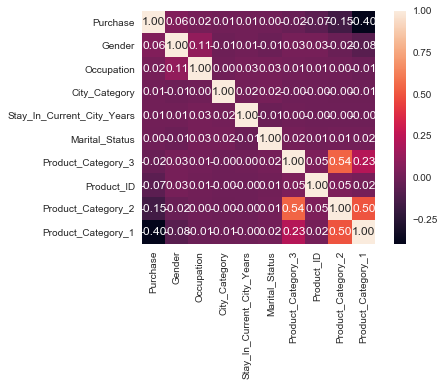

In [41]:
# Dealay with missing
nans = lambda df: df[df.isnull().any(axis=1)]
get_rows_which_are_NOT_in_other_dataframe = lambda df1, df2 :df1[~df1.index.isin(df2.index)]
data_with_out_nan = get_rows_which_are_NOT_in_other_dataframe(data,nans(data))
print(data_with_out_nan)
######################################






numeric_features = data_with_out_nan.select_dtypes(include=[np.number])



corr = numeric_features.corr()
correlation = data_with_out_nan.corr(method='pearson')
columns = correlation.nlargest(10, "Purchase").index

correlation_map = np.corrcoef(data_with_out_nan[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)
plt.show()

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Model Report
RMSE : 0.2303
CV Score : Mean - 0.1599 | Std - 0.0113 | Min - 0.1341 | Max - 0.1789
0.29786718254878564
dtrain_predictions2 ==  [0.75143299 0.62375516 0.69746567 ... 0.89603936 0.73944026 0.66960497]
        Product_Category_3
0                     14.0
1                     12.0
2                     13.0
3                     16.0
4                     14.0
5                     10.0
6                     13.0
7                     17.0
8                     18.0
9                     14.0
10                    15.0
11                    14.0
12                    14.0
13                    10.0
14                    13.0
15                    12.0
16                    11.0
17                    16.0
18                    17.0
19                    12.0
20                    16.0
21                    14.0
22                    14.0
23                    14.0
24                    13.0
25                    13.0
26                    14.0
27                    16.0
28  

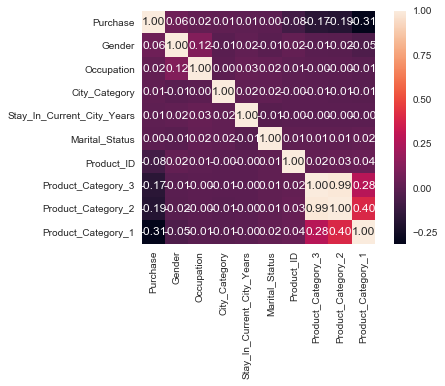

In [42]:
from sklearn.linear_model import LinearRegression

def data_normal_for_lr(data, target):
    min_ = data[target].min()
    max_ = data[target].max()
    
    data[target] = (data[target] - min_)/(max_ - min_)
    
    return data, min_, max_

def data_de_normal(lst, min_,max_):
    for i in range(len(lst)):
        lst[i] = lst[i] * (max_ - min_) + min_
    return lst    

def get_models_for_data_prediction(data_with_out_nan):
    LR2 = LinearRegression(normalize=True)
    X_train, X_test, Y_train, Y_test =  train_test_split (data_with_out_nan[['Product_Category_1','Product_Category_2']], data_with_out_nan['Product_Category_3'], test_size = 0.20, random_state=42)
    LR2.fit(X_train, Y_train)
    
    
    dtrain_predictions = LR2.predict(X_train)

    cv_score = cross_validate(LR2, X_train,(Y_train) , cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score['fit_time']))
    
    #Print model report:
    print("Model Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((Y_train).values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    y_pred = LR2.predict(X_test)
    y_true = np.array(Y_test)
    print(LR2.score(X_test,Y_test))
    
    
    return LR2
data['Product_Category_2']= \
data['Product_Category_2'].fillna(round(data['Product_Category_2'].mean(),0)).astype('float')
data.Product_Category_3.value_counts().sort_index()

df1 = data[['Product_Category_1','Product_Category_2']]

df2 = data[['Product_Category_1','Product_Category_2','Product_Category_3']]


def get_normal_data(data,df1,df2,data_with_out_nan):
    
    
    data_with_out_nan, min_,max_ = data_normal_for_lr(data_with_out_nan, 'Product_Category_3')
    
    data_reserv_two = copy.deepcopy(df1)
    data_reserv_all = copy.deepcopy(df2)
    
    LR2 = get_models_for_data_prediction(data_with_out_nan)
    
    data_reserv_two_nan = nans(df1)
    data_reserv_all_nan = nans(df2)
    
    dtrain_predictions2 = LR2.predict(df1)
    print('dtrain_predictions2 == ', dtrain_predictions2)
    #data.loc[data.Product_Category_3.isnull(), 'Product_Category_3'] = dtrain_predictions2
    
    dtrain_predictions2 = data_de_normal(dtrain_predictions2, min_,max_)
    
    
    k = 0
    lst = df2['Product_Category_3'].values.tolist()
    for i in range(len(lst)):
        if type(lst[i]) == type(np.nan):
            lst[i] = float(round(dtrain_predictions2[k],0))
            k += 1
    df = pd.DataFrame({'Product_Category_3':lst})
    data = data.drop(["Product_Category_3"], axis=1)
    print(df)
    data["Product_Category_3"] = df["Product_Category_3"]
    return data 
    
    
    
data = get_normal_data(data,df1,df2,data_with_out_nan)    
corr = numeric_features.corr()
correlation = data.corr(method='pearson')
columns = correlation.nlargest(10, "Purchase").index

correlation_map = np.corrcoef(data[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)
plt.show()    

In [43]:
data.to_csv('correctBF.csv', sep=',', encoding='utf-8',index=False)